# MATH 360 Introduction to Mathematical Modelling

### Modelling Assignment 6: Logistic Regression

Discussed with Anthony Mirarchi, Nara Sheen, Umay Gokturk, Tiffany Wu

### Part 1: Construct the Model - Logistic Regression

The `card_transdata_1.csv` dataset contains features that can be used to determine if a credit card transaction is genuine or fraud.  In particular, the dataset includes the following columns:
- `distance_from_home`: the distance from home where the transaction happened.
- `distance_from_last_transaction`: the distance from last transaction happened.
- `ratio_to_median_purchase_price`: ratio of purchased price transaction to median purchase price.
- `repeat_retailer`: is the transaction happened from same retailer.
- `used_chip`: is the transaction through chip (credit card).
- `used_pin_number`: is the transaction happened by using PIN number.
- `online_order`: is the transaction an online order.
- `fraud`: is the transaction fraudulent.

Construct a mathematical model using logistic regression for following **Tasks** below.


Present your work in a Jupyter notebook that includes:
- Problem statement
- Variable and parameter definitions 
- Assumptions and constraints
- Logistic regression
- Analysis

Students work individually and submit their work in class.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

print("packages imported")

packages imported


In [2]:
#fraud  data 
fraud_data = pd.read_csv('card_transdata_1.csv')

fraud = pd.DataFrame(fraud_data)
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   distance_from_home              10000 non-null  float64
 1   distance_from_last_transaction  10000 non-null  float64
 2   ratio_to_median_purchase_price  10000 non-null  float64
 3   repeat_retailer                 10000 non-null  int64  
 4   used_chip                       10000 non-null  int64  
 5   used_pin_number                 10000 non-null  int64  
 6   online_order                    10000 non-null  int64  
 7   fraud                           10000 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 625.1 KB


In [3]:
fraud.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1,1,0,0,0
1,10.829943,0.175592,1.294219,1,0,0,0,0
2,5.091079,0.805153,0.427715,1,0,0,1,0
3,2.247564,5.600044,0.362663,1,1,0,1,0
4,44.190936,0.566486,2.222767,1,1,0,1,0


**Task:** Write a problem statement.

Create a model to determine if a certain transaction is fraudaulent.

**Task:** State parameters and variables.

| Description | Symbol | Type |
| --- | --- | --- |
| Fraud | $Y$ | target variable |
| Distance from home | $X1$ | feature variable |
| Distance from last transaction | $X2$ | feature variable |
| Ratio to median purchase price | $X3$ | feature variable |
| Repeat retailer | $X4$ | feature variable |
| Used Chip | $X5$ | feature variable |
| Used pin number | $X6$ | feature variable |
| Online order | $X7$ | feature variable |
| Regularization parameter | $\alpha$ | parameter |
| Weights | $W$ | parameter |
| Bias | $b$ | parameter |

**Task:** State assumptions and constraints. 

- the measuring device to measure each feature and target is sufficiently accurate
- we will assume we can split the data in to a training set and a testing set with a 70-30 split
    - assume the model score is representative of when we deploy the model
- each features is independent and each observation independent
- the data is appropriate for logistic regression

**Task:** Define the data matrix `X` and target vector `y`.

In [4]:
X = fraud[["distance_from_home", "distance_from_last_transaction", "ratio_to_median_purchase_price", "repeat_retailer", "used_chip", "used_pin_number", "online_order"]]
y = fraud["fraud"]

**Task:** Determine the appropriate amount of regularization to include and then construct a logistic regression model using `LogisticRegression`.  Print out the weights and the bias values determined from your logistic regression.

In [6]:
model = LogisticRegression(C=1, max_iter=1000).fit(X,y)

print(f"Coefficient for distance_from_home: {model.coef_[0,0]} \n Coefficient for distance_from_last_transaction: {model.coef_[0,1]} \n Coefficient for ratio_to_median_purchase_price: {model.coef_[0,2]} \n Coefficient for repeat_retailer: {model.coef_[0,3]} \n Coefficient for used_chip: {model.coef_[0,4]} \n Coefficient for used_pin_number: {model.coef_[0,5]} \n Coefficient for online_order: {model.coef_[0,6]} \n Intercept: {model.intercept_[0]}")

Coefficient for distance_from_home: 0.015544294926603086 
 Coefficient for distance_from_last_transaction: 0.018303262042977213 
 Coefficient for ratio_to_median_purchase_price: 0.7387307753514848 
 Coefficient for repeat_retailer: -0.6389163790811185 
 Coefficient for used_chip: -1.1687920556248588 
 Coefficient for used_pin_number: -5.738843845728477 
 Coefficient for online_order: 7.237504624019285 
 Intercept: -10.58446694128626


This gives us a logistic regression equation of:

$$\sigma(x; W, b) = \frac{1}{1+e^{-(<W,x>+b)}}$$
where 
$$ W =
\begin{pmatrix}
0.01554 \\
0.01830 \\
0.7387 \\
-0.6389 \\
-1.1688 \\
-5.7388 \\
7.2375
\end{pmatrix},  b = -10.5845
$$

**Task:** Using a training set and testing split of your choosing, split the data into a training set and a testing set. Evaluate your model and explicitly state (i.e., calculate and print the result) the percentage of correctly classified fraudulent transactions. 

As stated in assumptions, we are going to be conducting 70-30 split of the data.

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3)

In [8]:
def costCE(W,b,X,y):
    N,p = X.shape
    W = np.array(W).reshape(p,1)
    y = np.array(y).reshape(N,1)
    S = 1/(1 + np.exp(-(X@W + b)))
    L = -1/N*np.sum(y*np.log(S) + (1 - y)*np.log(1 - S))
    return L

/Users/yushinnam/anaconda3/lib/python3.11/site-packages/pandas/core/internals/blocks.py:329: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/Users/yushinnam/anaconda3/lib/python3.11/site-packages/pandas/core/internals/blocks.py:329: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/Users/yushinnam/anaconda3/lib/python3.11/site-packages/pandas/core/internals/blocks.py:329: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


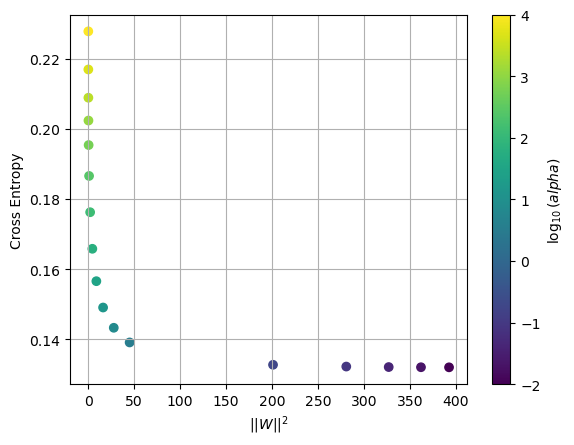

In [56]:
CEs = []
Rs = []
alphas = np.logspace(-2,4,20)
for alpha in alphas:
    model = LogisticRegression(C=1/alpha, max_iter=1000).fit(X,y)
    W = model.coef_
    b = model.intercept_
    CE = costCE(W,b,X,y)
    R = np.linalg.norm(W)**2
    CEs.append(CE)
    Rs.append(R)

plt.scatter(Rs,CEs,c=np.log10(alphas))
plt.grid(True), plt.colorbar(label='$\log_{10}(alpha)$')
plt.xlabel('$|| W ||^2$')
plt.ylabel('Cross Entropy')
plt.show()

Our goal is to minimize the Cross Entropy as much as possible and at the same time, we don't want $||W||^2$ to be very large. In this case, it is appropriate to choose $\alpha = 10^{-1}$. 

In [60]:
a = 1/10
model = LogisticRegression(C=1/a, max_iter = 1000).fit(X_train, Y_train)

In [61]:
model.score(X_test, Y_test)

0.959

In [62]:
len(y[y == 0])/len(y)

0.9159

In [65]:
C = confusion_matrix(Y_test,model.predict(X_test))
y_pred = model.predict(X_test)

In [69]:
false_neg = np.sum(Y_test[Y_test == 1]- y_pred[Y_test == 1])
print("number of false negatives: ", false_neg, ",  percent false negatives: ", (false_neg/len(Y_test[Y_test == 1]))*100)
false_pos = np.sum( y_pred[Y_test == 0]- Y_test[Y_test == 0])
print("number of false positives: ", false_pos, ",  percent false positives: ", (false_pos/len(Y_test[Y_test == 0]))*100)
print(C)

number of false negatives:  103 ,  percent false negatives:  42.38683127572017
number of false positives:  20 ,  percent false positives:  0.7254261878853826
[[2737   20]
 [ 103  140]]


**Task:** Scale the matrix `X` and perform a new logistic regression.  Do you achieve the same level of accuracy?  Is this expected?

Again, we are performing a 70-30 split after the scale.

In [11]:
Xs = StandardScaler().fit_transform(X)

Xs_train, Xs_test, Ys_train, Ys_test = train_test_split(Xs, y, test_size = 0.3)

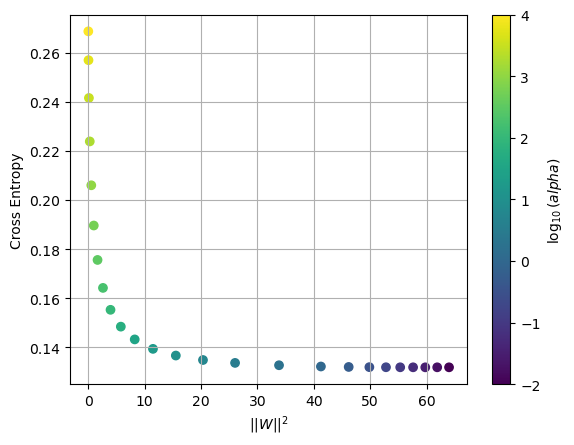

In [39]:
CEs1 = []
Rs1 = []
alphas = np.logspace(-2,4,25)
for alpha in alphas:
    model = LogisticRegression(C=1/alpha,max_iter=1000).fit(Xs,y)
    W = model.coef_
    b = model.intercept_
    CE = costCE(W,b,Xs,y)
    R = np.linalg.norm(W)**2
    CEs1.append(CE)
    Rs1.append(R)

plt.scatter(Rs1,CEs1,c=np.log10(alphas))
plt.grid(True)
plt.colorbar(label='$\log_{10}(alpha)$')
plt.xlabel('$|| W ||^2$')
plt.ylabel('Cross Entropy')
plt.show()

In the plot above, we again see that choosing $\alpha = 10^{-1}$ is a great option because it gives the best minimized Cross Entropy and $ ||W|| ^2$ at the same time.

In [71]:
alpha = 1/10
log_reg = LogisticRegression(C=1/alpha).fit(Xs_train, Ys_train)

In [72]:
print(f"Coefficient for distance_from_home: {log_reg.coef_[0,0]} \n Coefficient for distance_from_last_transaction: {log_reg.coef_[0,1]} \n Coefficient for ratio_to_median_purchase_price: {log_reg.coef_[0,2]} \n Coefficient for repeat_retailer: {log_reg.coef_[0,3]} \n Coefficient for used_chip: {log_reg.coef_[0,4]} \n Coefficient for used_pin_number: {log_reg.coef_[0,5]} \n Coefficient for online_order: {log_reg.coef_[0,6]} \n Intercept: {log_reg.intercept_[0]}")

Coefficient for distance_from_home: 1.0094001232997096 
 Coefficient for distance_from_last_transaction: 0.3137646789976279 
 Coefficient for ratio_to_median_purchase_price: 2.3040333071147514 
 Coefficient for repeat_retailer: -0.22551323025306752 
 Coefficient for used_chip: -0.6174754462453889 
 Coefficient for used_pin_number: -15.251978399250296 
 Coefficient for online_order: 4.451250835116457 
 Intercept: -11.071622874539553


Since both scaled and unscaled data give us $\alpha = 10^{-1}$ as our regularization parameter, we can choose either of them. However, scaled data shows more consistency and steady in the Cross Entroopy vs. $||W||^2$ plot, we will choose scaled data. 

In [73]:
log_reg.score(Xs_test, Ys_test)

0.966

In [74]:
len(Ys_test[Ys_test == 0])/len(Ys_test)

0.9173333333333333

We have a accuracy score of approximately 97%. Furthermore, we checked if our model is doing better than just picking the most common outcome and we can see that our model is doing a bit better than just picking the most common outcome. 

In [79]:
C = confusion_matrix(Ys_test,log_reg.predict(Xs_test))

y_pred = log_reg.predict(Xs_test)

In [80]:
false_neg = np.sum(Ys_test[Ys_test == 1]- y_pred[Ys_test == 1])
print("number of false negatives: ", false_neg, ",  percent false negatives: ", (false_neg/len(Ys_test[Ys_test == 1]))*100)
false_pos = np.sum( y_pred[Ys_test == 0]- Ys_test[Ys_test == 0])
print("number of false positives: ", false_pos, ",  percent false positives: ", (false_pos/len(Ys_test[Ys_test == 0]))*100)
print(C)

number of false negatives:  91 ,  percent false negatives:  36.693548387096776
number of false positives:  11 ,  percent false positives:  0.39970930232558144
[[2741   11]
 [  91  157]]


**Task:** Pick a model: the model without scaled data or the model with scaled data (be sure to justify your choice!). 

Using your chosen model, print out the $W$ and $b$ values.  From your values, determine the $2$ features which have the largest $W$ (in absolute magnitude).  Refit the model with these features and determine the accuracy.  

Compare this model with the previous models.  Is there improvement?  In particular, produce the confusion matrices and discuss the false positives/negatives in the context of the modelling task.

In [82]:
W = abs(log_reg.coef_)
print(W)

[[ 1.00940012  0.31376468  2.30403331  0.22551323  0.61747545 15.2519784
   4.45125084]]


We see that the two largest absolute value of coefficients are used_pin and online_order. We now fit a logistic regression using these two variables. 

In [86]:
X_refit = fraud[["used_pin_number", "online_order"]]
X_train, X_test, Y_train, Y_test = train_test_split(X_refit, y, test_size=0.3)

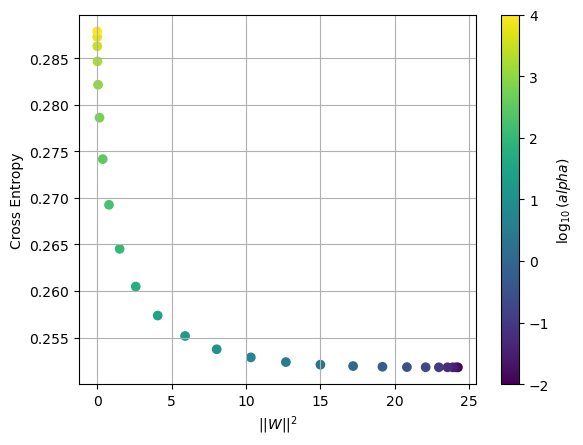

In [89]:
CEs1 = []
Rs1 = []
alphas = np.logspace(-2,4,25)
for alpha in alphas:
    model = LogisticRegression(C=1/alpha,max_iter=1000).fit(X_refit,y)
    W = model.coef_
    b = model.intercept_
    CE = costCE(W,b,X_refit,y)
    R = np.linalg.norm(W)**2
    CEs1.append(CE)
    Rs1.append(R)

plt.scatter(Rs1,CEs1,c=np.log10(alphas))
plt.grid(True)
plt.colorbar(label='$\log_{10}(alpha)$')
plt.xlabel('$|| W ||^2$')
plt.ylabel('Cross Entropy')
plt.show()

We now want to choose $\alpha$ such that our Cross Entropy is minimized and $||W||^2$ is not too big at the same time. We can choose $\alpha = 0$. This means we have $C = 1/\alpha = 1/\log_{10}(0) = 1$

In [91]:
model_refit = LogisticRegression(C=1, max_iter=1000).fit(X_train, Y_train)

print(f"W: {model_refit.coef_} \nb: {model_refit.intercept_}" )

W: [[-2.7589273   2.85074578]] 
b: [-4.67053435]


In [92]:
pred = model_refit.score(X_test, Y_test)
print(f"Model Score: {pred}")

Model Score: 0.916


In [94]:
C = confusion_matrix(Y_test, model_refit.predict(X_test))
C

array([[2748,    0],
       [ 252,    0]])

We notice that the model score has decreased from 0.966 to 0.916.

**Task:** Once you have determine the $2$ features from the previous task, visualize the model and showcase how the model behaves with varying input.  Be creative here! 

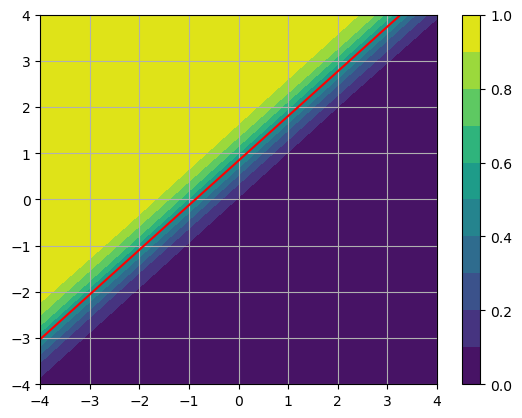

In [108]:
x0 = np.linspace(-4,4,20)
x1 = np.linspace(-4,4,20)
X0, X1 = np.meshgrid(x0, x1)
W0 = model_refit.coef_[-1][-2]
W1 = model_refit.coef_[-1][-1]
b = model.intercept_

Y = 1/(1+np.exp(-(W0*X0 + W1*X1 + b)))

plt.contourf(X0, X1, Y, levels=np.arange(0,1.1,0.1))
plt.colorbar()
plt.contour(X0, X1, Y, levels=[0.5], colors='r')
plt.grid(True)
plt.show()

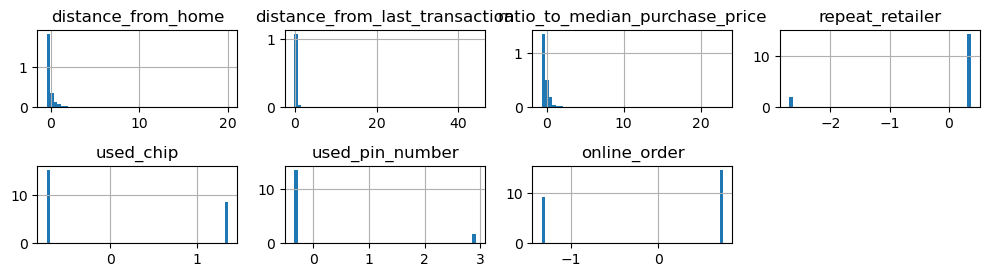

In [101]:
X0 = Xs[y == 0]

plt.figure(figsize=(10,4))
for i in range(0,7):
    plt.subplot(3,4,i+1)
    plt.hist(X0[:,i],density=True,bins=50)
    plt.title(fraud.columns[i])
    plt.grid(True)
plt.tight_layout()
plt.show()

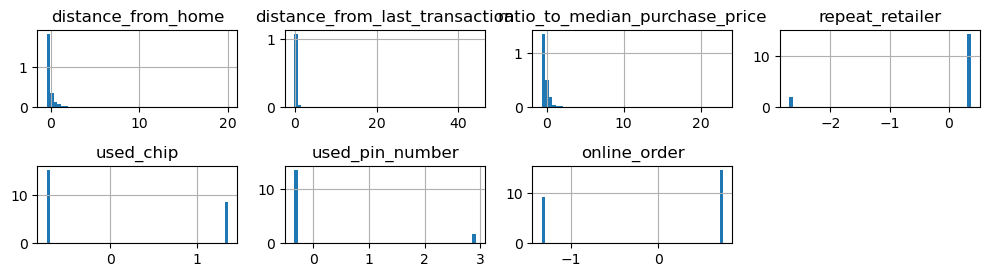

In [102]:
X1 = X[y == 1]

plt.figure(figsize=(10,4))
for i in range(0,7):
    plt.subplot(3,4,i+1)
    plt.hist(X0[:,i],density=True,bins=50)
    plt.title(fraud.columns[i])
    plt.grid(True)
plt.tight_layout()
plt.show()

### Part 2: Collaborate, Refine, and Simulate the Model

After submitting your work in Part 1 in class, work in groups and compare your results. Collaborate, refine, and simulate your models.

Present your work in a Jupyter notebook including all parts in Part $1$ along with:
- Numerical solutions
- Visualizations of solutions
- Analysis and discussion of the results.

In addition, include a clearly labelled section at the end of your Jupyter notebook, where you discuss the improvements you have made and/or what steps have been taken to refine the model.

Students work collaboratively but submit their own final Jupyter notebook individually. Include names of all students with whom you collaborated in Part $2$.

#### Part 2 - Reflection 
This reflection should have two parts: 

1) Explain in a list of bullet points the changes you have made to your model in the version you are submitting and why you chose to make those changes. 

2) In a paragraph or two reflect on the following prompts:
    - What part of the six modelling steps was the most challenging for you?
    - What helped you to identify any mistakes/misconceptions in your original model?
    - Do you think these techniques would be helpful for identifying mistakes/misconceptions in future assignments? Why or why not? 

1. 
* Due to my miscomprehension on the last two questions, I determined two variables with high coefficients, used_pin_number and online_order, and refit the logistic regression.
* I was able to notice that the model score was lower than our previous model with a scale. This could be done after correctly fitting the model using the two variables.
* I was able to add more visualization that I referred from the course note and practice problems. The contour represents by regions with colors in classification and the subplots describes the behaviour of each variable when $y = 0$ and $y = 1$

2. 
In this assignment, analyzing and assessing was the most difficult part. Similar to the previous assignment, setting up an equation and implement a programming maneuver was easy because merely following the steps with little bit of application was sufficient. However, after getting the result, we were furhter required to examine what the numbers represent. Individuals are required to be more analytical in this section and I aspire to be and something I am learning in this course. 